In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib. pyplot as plt
import matplotlib
from sklearn.preprocessing import MinMaxScaler
from keras.layers import LSTM, Dense, Dropout
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.dates as mandates
from sklearn.preprocessing import MinMaxScaler
from sklearn import linear_model
from keras.models import Sequential
from keras.layers import Dense
import keras.backend as K
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras.models import load_model
from keras.layers import LSTM
from keras.utils.vis_utils import plot_model

In [2]:
data = pd.read_csv("data.csv")

In [3]:
data

,Retirement,Debut Age (yrs),Longest Gap b/w innings,Time of best moving avg,No of innings,Time of worst moving avg,time of better score than 20% best scores
0,34.112329,20.832877,703,0.790576,191,0.272251,0.837696
1,26.035616,23.158904,337,0.515152,33,0.939394,0.969697
2,36.194521,27.975342,318,0.715328,137,0.532847,0.890511
3,22.147945,19.619178,346,0.392857,28,0.928571,1.000000
4,29.063014,21.783562,1018,0.541667,24,0.958333,0.666667
...,...,...,...,...,...,...,...
91,34.991781,18.646575,571,0.693878,147,0.068027,0.952381
92,30.326027,22.901370,1489,0.884615,26,0.423077,1.000000
93,39.443836,22.243836,480,0.497653,213,0.056338,0.906103
94,30.983562,21.843836,526,0.758065,62,0.467742,0.935484


In [4]:
data.columns

Index(['Retirement', 'Debut Age (yrs)', 'Longest Gap b/w innings',
       'Time of best moving avg', 'No of innings', 'Time of worst moving avg',
       'time of better score than 20% best scores'],
      dtype='object')

In [5]:
# data["Age (yrs)"] = np.random.permutation(data["Age (yrs)"].values)
# data

In [6]:
#Set Target Variable
output_var = pd.DataFrame(data['Retirement'])
#Selecting the Features
features = [
	"Debut Age (yrs)",	"Longest Gap b/w innings",	"Time of best moving avg",	"No of innings",	"Time of worst moving avg",	"time of better score than 20% best scores"
    ]


In [45]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
feature_transform = scaler.fit_transform(data[features])
feature_transform= pd.DataFrame(columns=features, data=feature_transform, index=data.index)
feature_transform.head()
# feature_transform

,Debut Age (yrs),Longest Gap b/w innings,Time of best moving avg,No of innings,Time of worst moving avg,time of better score than 20% best scores
0,0.184319,0.101735,0.767237,0.628253,0.230214,0.619211
1,0.358580,0.028725,0.452918,0.040892,0.941543,0.928904
2,0.719417,0.024935,0.681364,0.427509,0.508069,0.743122
3,0.093391,0.030521,0.313353,0.022305,0.930004,1.000000
4,0.255542,0.164572,0.483177,0.007435,0.961737,0.217949


In [46]:
#Splitting to Training set and Test set
timesplit= TimeSeriesSplit(n_splits=3)
for train_index, test_index in timesplit.split(feature_transform):
        X_train, X_test = feature_transform[:len(train_index)], feature_transform[len(train_index): (len(train_index)+len(test_index))]
        y_train, y_test = output_var[:len(train_index)].values.ravel(), output_var[len(train_index): (len(train_index)+len(test_index))].values.ravel()

In [47]:
#Process the data for LSTM
trainX =np.array(X_train)
testX =np.array(X_test)
X_train = trainX.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = testX.reshape(X_test.shape[0], 1, X_test.shape[1])

In [48]:
#Building the LSTM Model
lstm = Sequential()
lstm.add(LSTM(32, input_shape=(1, trainX.shape[1]), activation='relu', return_sequences=False))
lstm.add(Dense(5))
lstm.add(Dense(1))
lstm.compile(loss='mean_squared_error', optimizer='adam')
plot_model(lstm, show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [49]:
history=lstm.fit(X_train, y_train, epochs=100, batch_size=8, verbose=1, shuffle=False)

Epoch 1/100
9/9 [==============================] - 1s 3ms/step - loss: 1090.6654
Epoch 2/100
9/9 [==============================] - 0s 3ms/step - loss: 1087.1552
Epoch 3/100
9/9 [==============================] - 0s 2ms/step - loss: 1083.6256
Epoch 4/100
9/9 [==============================] - 0s 3ms/step - loss: 1079.7812
Epoch 5/100
9/9 [==============================] - 0s 3ms/step - loss: 1075.3051
Epoch 6/100
9/9 [==============================] - 0s 3ms/step - loss: 1069.7356
Epoch 7/100
9/9 [==============================] - 0s 3ms/step - loss: 1062.7104
Epoch 8/100
9/9 [==============================] - 0s 3ms/step - loss: 1053.9861
Epoch 9/100
9/9 [==============================] - 0s 3ms/step - loss: 1043.2531
Epoch 10/100
9/9 [==============================] - 0s 3ms/step - loss: 1030.1344
Epoch 11/100
9/9 [==============================] - 0s 3ms/step - loss: 1014.1521
Epoch 12/100
9/9 [==============================] - 0s 2ms/step - loss: 994.7526
Epoch 13/100
9/9 [========

In [50]:
y_pred= lstm.predict(X_test)

1/1 [==============================] - 0s 203ms/step


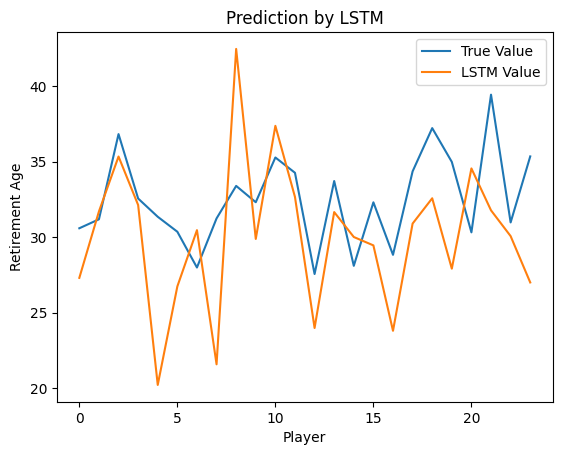

In [51]:
plt.plot(y_test, label='True Value')
plt.plot(y_pred, label='LSTM Value')
plt.title("Prediction by LSTM")
plt.xlabel('Player')
plt.ylabel('Retirement Age')
plt.legend()
plt.show()